Restrictions via algorithm with convenience function
===========================================

------------------- Parameter summary --------------------
      A =     0.536203, free: T, restricted: F, related: F
     mu =      10.3404, free: T, restricted: F, related: F
    sig =            5, free: T, restricted: T, related: F
    off =       1.0047, free: T, restricted: F, related: F
    lin =            0, free: F, restricted: F, related: F
----------------------------------------------------------


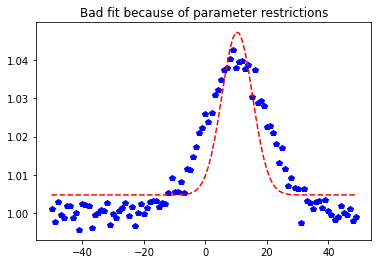

In [1]:
from __future__ import print_function, division
from numpy import arange, sqrt, exp, pi, random, ones_like
import matplotlib.pylab as plt
from PyAstronomy import funcFit2 as fuf2
import scipy.optimize as sco

random.seed(1234)

# Creating a Gaussian with some noise
# Choose some parameters...
gPar = {"A":1.0, "sig":10.0, "mu":10.0, "off":1.0, "lin":0.0}
# Calculate profile
x = arange(100) - 50.0
y = gPar["off"] + gPar["A"] / sqrt(2*pi*gPar["sig"]**2) \
    * exp(-(x-gPar["mu"])**2/(2*gPar["sig"]**2))
# Add some noise...
y += random.normal(0.0, 0.002, x.size)
# ...and save the error bars
yerr = ones_like(x)*0.002
# Let us see what we have done...
plt.plot(x, y, 'bp')

# Create a model object
gf = fuf2.GaussFit()

# Set guess values for the parameters
gf.assignValues({"A":3, "sig":3.77, "off":0.96, "mu":10.5})

# 'Thaw' those (the order is irrelevant)
gf.thaw(["mu", "sig", "off", "A"])

# Restrict the valid range for sigma
gf.setRestriction({"sig":[0.01,5]})

# The convenience function 'fitfmin_l_bfgs_b1d' automatically channels
# the restrictions from the model to the algorithm.
fuf2.fitfmin_l_bfgs_b(gf, x, y, yerr=yerr)

gf.parameterSummary()
plt.title("Bad fit because of parameter restrictions")
plt.plot(x, gf.evaluate(x), 'r--')
plt.show()